In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [3]:

data = pd.read_csv('output.csv', header=None)
data.columns = ['Test', 'Nr', 'Nt', 'NoiseLevel', 'ErrorPercentage', 'BER','SNR','EVM', 'cap']
print(data.describe())

            Test          Nr          Nt  NoiseLevel  ErrorPercentage  \
count  32.000000   32.000000   32.000000   32.000000         32.00000   
mean   16.500000   65.750000  125.500000    1.500000         17.53125   
std     9.380832   83.134947  169.534467    1.135924         20.89140   
min     1.000000    2.000000    4.000000    0.000000          0.00000   
25%     8.750000    7.000000   14.000000    0.750000          0.00000   
50%    16.500000   32.000000   40.000000    1.500000          6.50000   
75%    24.250000   80.000000  160.000000    2.250000         33.25000   
max    32.000000  256.000000  512.000000    3.000000         62.00000   

             BER        SNR        EVM        cap  
count  32.000000  32.000000  32.000000  32.000000  
mean    0.179500  13.732802 -13.732802   4.689794  
std     0.210359   6.454988   6.454988   2.024920  
min     0.000000   4.184517 -23.771424   1.856351  
25%     0.004288   7.183075 -18.802058   2.638698  
50%     0.069039  13.561317 -1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


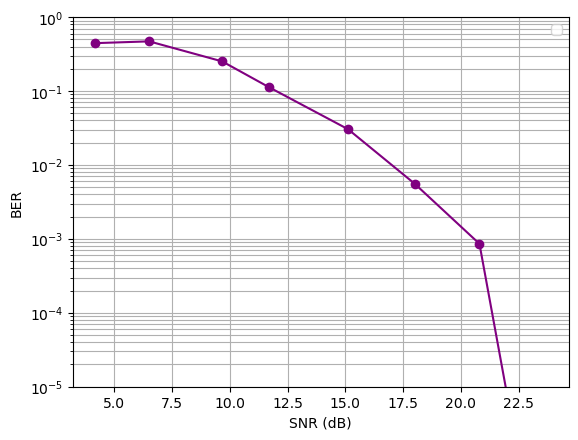

In [4]:
# Select every fourth row starting from 0
#data = data.iloc[::4, :]

data.columns = ['Test', 'Nr', 'Nt', 'NoiseLevel', 'ErrorPercentage', 'BER','SNR','EVM', 'cap']

noise_intervals = {
    3: '',
    }

data['NoiseLevel'] = data['NoiseLevel'].map(noise_intervals)

# Group the data by SNR and NoiseLevel and calculate the mean of BER
grouped_ber = data.groupby(['SNR', 'NoiseLevel'])['BER'].mean().reset_index()

# Create a semilogy plot for each noise level
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    plt.semilogy(subset['SNR'], subset['BER'], label=noise_level, color='purple', marker='o') 
                 #marker='s')

plt.ylabel('BER')
plt.xlabel('SNR (dB)')
plt.ylim([10**(-5), 1])
plt.grid(True, which ="both")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


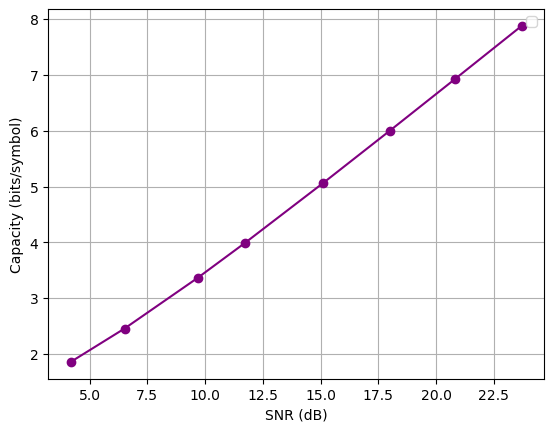

In [5]:


# Group the data by SNR and NoiseLevel and calculate the mean of cap
grouped_cap = data.groupby(['SNR', 'NoiseLevel'])['cap'].mean().reset_index()

# Create a plot for each noise level
plt.figure()
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    plt.plot(subset['SNR'], subset['cap'], label=noise_level, marker='o', color='purple')

plt.ylabel('Capacity (bits/symbol)')
plt.xlabel('SNR (dB)')
plt.grid(True, which ="both")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


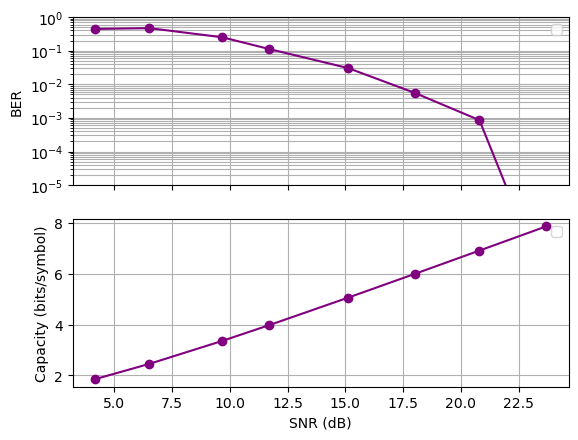

In [6]:
data = pd.read_csv('output.csv', header=None)


fig, axs = plt.subplots(2, 1, sharex=True)

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    axs[0].semilogy(subset['SNR'], subset['BER'], label=noise_level, color='purple', marker='o')
axs[0].set_ylabel('BER')
axs[0].set_ylim([10**(-5), 1])
axs[0].grid(True, which ="both")
axs[0].legend()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    axs[1].plot(subset['SNR'], subset['cap'], label=noise_level, marker='o', color='purple')
axs[1].set_ylabel('Capacity (bits/symbol)')
axs[1].set_xlabel('SNR (dB)')
axs[1].grid(True, which ="both")
axs[1].legend()

# Save the figure as an EPS file


plt.show()


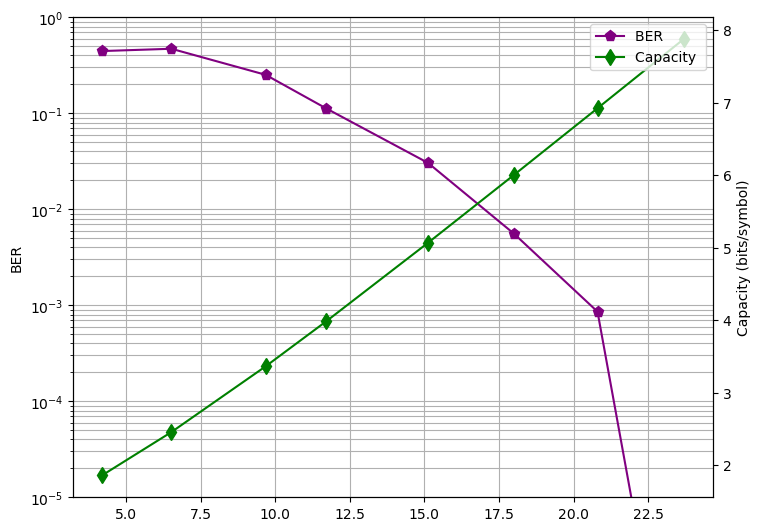

In [16]:
fig, ax1 = plt.subplots()

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    ax1.semilogy(subset['SNR'], subset['BER'], label='BER '+str(noise_level), color='purple', marker='p', markersize=8)
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    ax2.plot(subset['SNR'], subset['cap'], label='Capacity '+str(noise_level), marker='d', color='green', markersize=8)

ax2.set_ylabel('Capacity (bits/symbol)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('SNR (dB)')

# Adjust plot area
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure as a PDF file with tight bounding box
plt.savefig('figure.pdf', format='pdf', bbox_inches='tight')

plt.show()

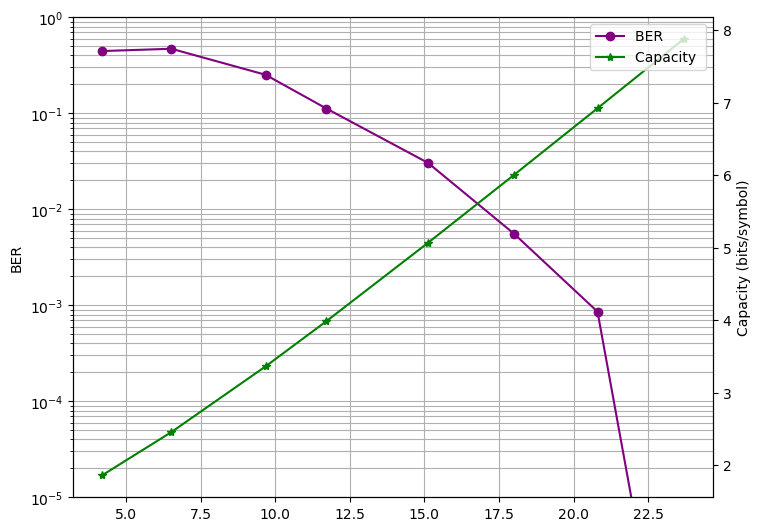

In [8]:
fig, ax1 = plt.subplots()

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    ax1.semilogy(subset['SNR'], subset['BER'], label='BER '+str(noise_level), color='purple', marker='o')
    if 'Nr' in subset.columns and 'Nt' in subset.columns:
        for i in range(len(subset)):
            ax1.annotate(f'Nr={subset.iloc[i]["Nr"]}, Nt={subset.iloc[i]["Nt"]}', (subset.iloc[i]['SNR'], subset.iloc[i]['BER']))
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    ax2.plot(subset['SNR'], subset['cap'], label='Capacity '+str(noise_level), marker='*', color='green')

ax2.set_ylabel('Capacity (bits/symbol)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('SNR (dB)')

# Adjust plot area
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure as a PDF file with tight bounding box
plt.savefig('figure.pdf', format='pdf', bbox_inches='tight')

plt.show()

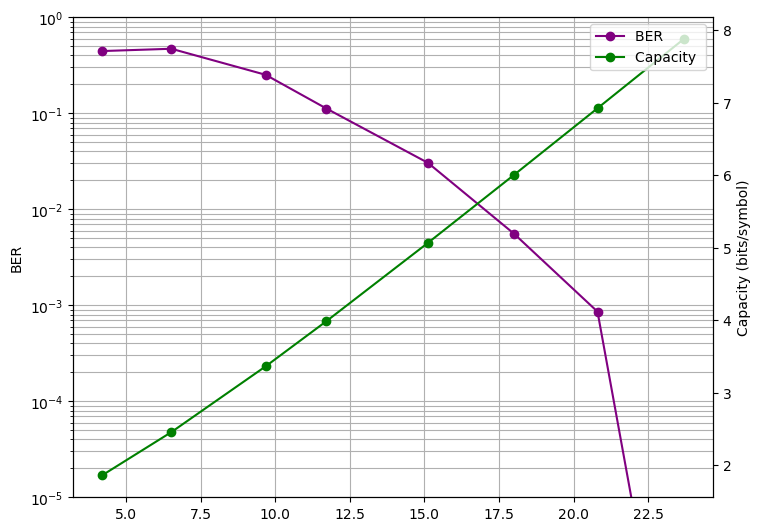

In [9]:
fig, ax1 = plt.subplots()

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    ax1.semilogy(subset['SNR'], subset['BER'], label='BER '+str(noise_level), color='purple', marker='o')
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    ax2.plot(subset['SNR'], subset['cap'], label='Capacity '+str(noise_level), marker='o', color='green')

ax2.set_ylabel('Capacity (bits/symbol)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('SNR (dB)')

# Adjust plot area
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure as a PDF file with tight bounding box
plt.savefig('figure.pdf', format='pdf', bbox_inches='tight')

plt.show()

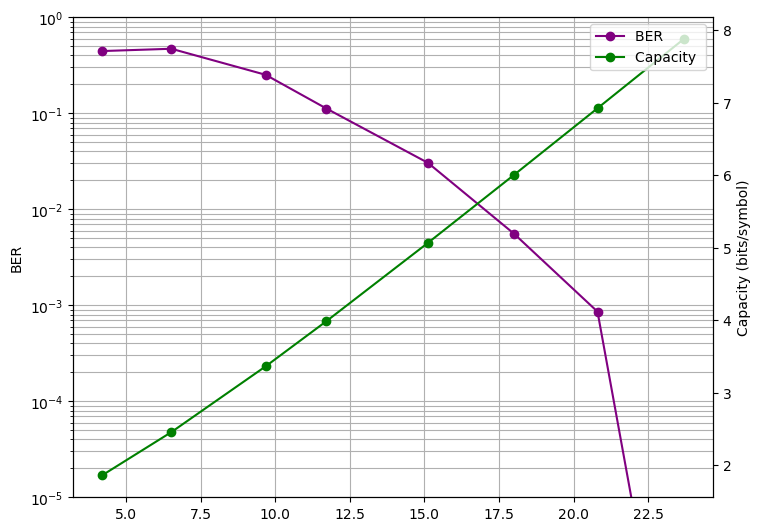

In [10]:
fig, ax1 = plt.subplots()

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    ax1.semilogy(subset['SNR'], subset['BER'], label='BER '+str(noise_level), color='purple', marker='o')
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    ax2.plot(subset['SNR'], subset['cap'], label='Capacity '+str(noise_level), marker='o', color='green')

ax2.set_ylabel('Capacity (bits/symbol)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('SNR (dB)')

# Adjust plot area
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure as a PDF file with tight bounding box
plt.savefig('figure.pdf', format='pdf', bbox_inches='tight')

plt.show()

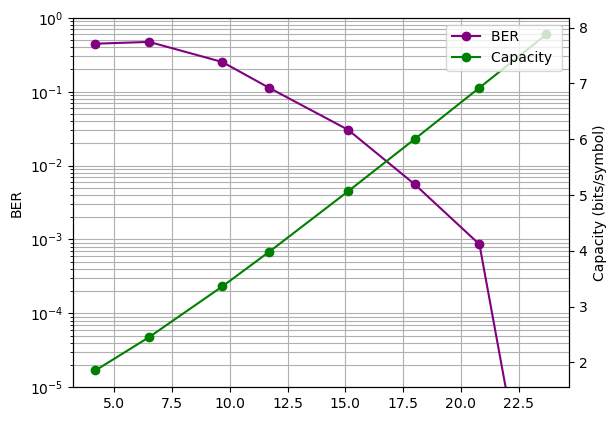

In [11]:
fig, ax1 = plt.subplots()

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    ax1.semilogy(subset['SNR'], subset['BER'], label='BER '+str(noise_level), color='purple', marker='o')
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    ax2.plot(subset['SNR'], subset['cap'], label='Capacity '+str(noise_level), marker='o', color='green')

ax2.set_ylabel('Capacity (bits/symbol)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('SNR (dB)')

# Save the figure as a PDF file with tight bounding box
plt.savefig('figure.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [12]:

# Group the data by EVM and NoiseLevel and calculate the mean of BER
grouped_ber_evm = data.groupby(['EVM', 'NoiseLevel'])['BER'].mean().reset_index()

# Create a semilogy plot for each noise level
plt.figure()
for noise_level in grouped_ber_evm['NoiseLevel'].unique():
    subset = grouped_ber_evm[grouped_ber_evm['NoiseLevel'] == noise_level]
    plt.semilogy(subset['EVM'], subset['BER'], label=noise_level, marker='d')

plt.ylabel('BER')
plt.xlabel('EVM')
plt.grid(True, which ="both")
plt.legend()
plt.show()

KeyError: 'EVM'

/tmp/ipykernel_12005/2374753429.py:18: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_12005/2374753429.py:21: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



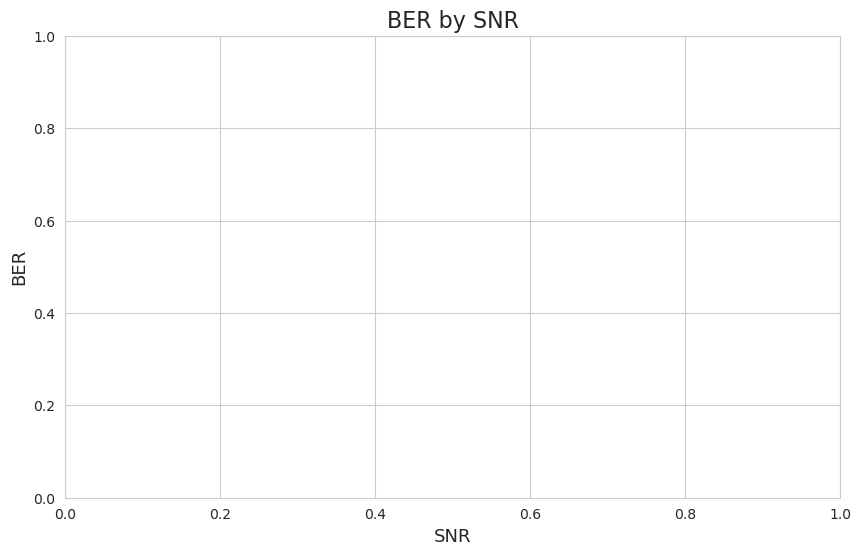

In [ ]:
#data = data[(data['Nr'] <= 64) & (data['Nt'] <= 64)]
#data = data[(data['Nr'] >= 2) & (data['Nr'] <= 60)]
#data = data.head(16) # Considerar apenas os 24 primeiros registros

noise_intervals = {
    3: '[-1, 1]'
}

data['NoiseLevel'] = data['NoiseLevel'].map(noise_intervals)

# Group the data by Nt and NoiseLevel and calculate the mean of ErrorPercentage
# Group the data by SNR and NoiseLevel and calculate the mean of BER
grouped = data.groupby(['SNR', 'NoiseLevel'])['BER'].mean().reset_index()

# Create a line plot for each noise level
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='SNR', y='BER', hue='NoiseLevel', data=grouped, palette="tab10", linewidth=2.5)

# Add points without legend
sns.scatterplot(x='SNR', y='BER', hue='NoiseLevel', data=grouped, palette="tab10", s=100, legend=False)

plt.xlabel('SNR', fontsize=13)
plt.ylabel('BER', fontsize=13)
plt.title('BER by SNR', fontsize=16)
plt.show()


In [ ]:


#
## Load your data
#data = pd.read_csv('output.csv', header=None)
#data.columns = ['Test', 'Nr', 'Nt', 'NoiseLevel', 'ErrorPercentage', 'BER','SNR','EVM', 'cap']
#
#noise_intervals = {
#    3: '[-1, 1]'}

data['NoiseLevel'] = data['NoiseLevel'].map(noise_intervals)

# Group the data by SNR and NoiseLevel and calculate the mean of BER
grouped_ber = data.groupby(['SNR', 'NoiseLevel'])['BER'].mean().reset_index()

# Create a line plot for each noise level
fig_ber = go.Figure()

for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    fig_ber.add_trace(go.Scatter(x=subset['SNR'], y=subset['BER'], mode='lines+markers', name=noise_level, showlegend=False))

fig_ber.update_layout(
    title='BER by SNR',
    xaxis_title='SNR',
    yaxis_title='BER'
)

fig_ber.show()

# Group the data by SNR and NoiseLevel and calculate the mean of cap
grouped_cap = data.groupby(['SNR', 'NoiseLevel'])['cap'].mean().reset_index()

# Create a line plot for each noise level
fig_cap = go.Figure()

for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    fig_cap.add_trace(go.Scatter(x=subset['SNR'], y=subset['cap'], mode='lines+markers', name=noise_level, showlegend=False))

fig_cap.update_layout(
    title='cap by SNR',
    xaxis_title='SNR',
    yaxis_title='cap'
)

fig_cap.show()